# Load libraries

In [25]:
import pandas
from sklearn.linear_model import LinearRegression
import numpy
import matplotlib.pyplot as plt

# Load data

In [2]:
# load data
dataset = pandas.read_excel("../dataset/powerElectricGeneration.xlsx")

# Analyze data

In [5]:
# get a general description
dataset.describe()

,Temperature,Volume,Pressure,Humidity,Power Electric
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


array([[<AxesSubplot:xlabel='Temperature', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Volume', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Pressure', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Humidity', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Power Electric', ylabel='Temperature'>],
       [<AxesSubplot:xlabel='Temperature', ylabel='Volume'>,
        <AxesSubplot:xlabel='Volume', ylabel='Volume'>,
        <AxesSubplot:xlabel='Pressure', ylabel='Volume'>,
        <AxesSubplot:xlabel='Humidity', ylabel='Volume'>,
        <AxesSubplot:xlabel='Power Electric', ylabel='Volume'>],
       [<AxesSubplot:xlabel='Temperature', ylabel='Pressure'>,
        <AxesSubplot:xlabel='Volume', ylabel='Pressure'>,
        <AxesSubplot:xlabel='Pressure', ylabel='Pressure'>,
        <AxesSubplot:xlabel='Humidity', ylabel='Pressure'>,
        <AxesSubplot:xlabel='Power Electric', ylabel='Pressure'>],
       [<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>,
        

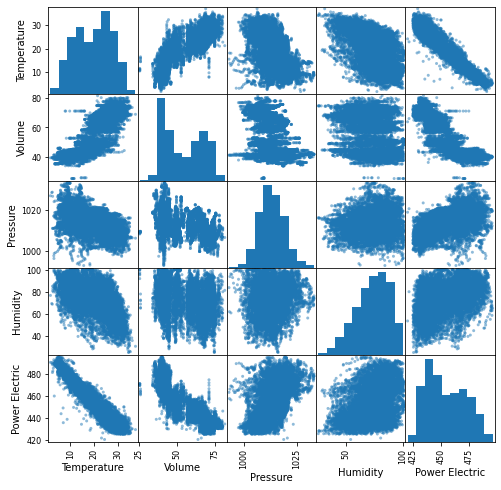

In [7]:
# improt specific method
from pandas.plotting import scatter_matrix

# display scatter matrix
scatter_matrix(
    dataset,
    diagonal = "hist",
    figsize = (8,8)
)

# Train model

In [10]:
# get the data
x = dataset.loc[:, ["Temperature"]]
y = dataset.loc[:, ["Power Electric"]] # labels

In [17]:
# define model
regressor = LinearRegression()

In [18]:
# train model
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Do predictions

In [34]:
# data to predict
xPredict = numpy.array([[
    30
]])

# get the prediction
prediction = regressor.predict(xPredict)

print("With temperature " + str(xPredict[0][0]) + " the power electric generation is: " + str(prediction[0][0]))

With temperature 30 the power electric generation is: 431.8945211372329


# Plot resutls

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


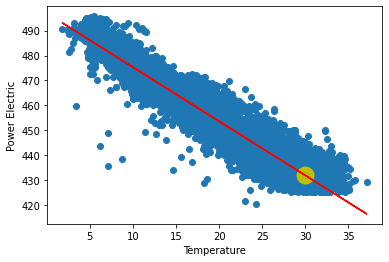

In [35]:
# create the figure
fix, ax = plt.subplots()

# add labels to the plot
ax.set_xlabel("Temperature")
ax.set_ylabel("Power Electric")

# add dataset
ax.scatter(x, y)

# plot the model
ax.plot(
    x, 
    regressor.intercept_[0] + regressor.coef_[0]*x,
    c = "r"
)


# add the prediction
ax.scatter(
    xPredict, 
    prediction,
    c = "y",
    lineWidth = 12
)